# MLP-2
- Dataset: EMNIST ByClass
- Model: MLP (2 hidden layer, (256, 128) units, ReLU, Dropout 0.2)
- Batch Size: 2048
- Output Layer: 62 classes
- Accuracy

In [52]:
import numpy as np
from scipy.io import loadmat
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

In [53]:
# Load the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# ds = tfds.load('mnist', split='train', shuffle_files=True)

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    image = tf.reshape(image, [-1])
    return image, label

BATCH_SIZE = 2048
ds_train = ds_train.map(preprocess).shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28 * 28,)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(62, activation='softmax')  # 62 classes for EMNIST ByClass
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

/Users/shimizutaisei/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

test_loss, test_accuracy = model.evaluate(ds_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3529 - loss: 2.7285

In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

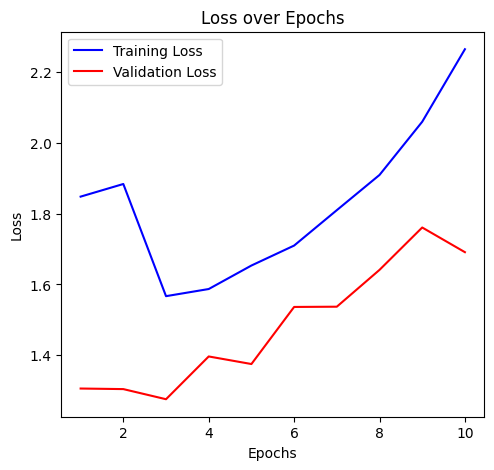

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

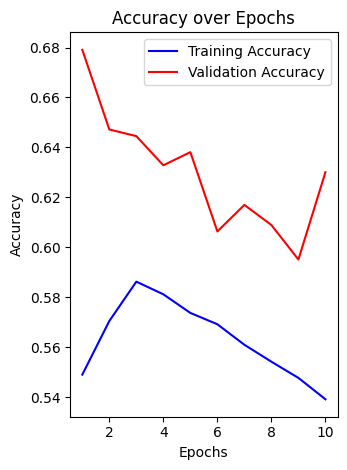

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()